#Mushroom data classification

Menggunakan algoritma Naive Bayes dan KNN

Step
1. Analisa Data
2. Data Preprocessing
3. Classification

#Analisa Data

In [3]:
import pandas as pd
import numpy as np


df = pd.read_csv('mushrooms.csv')


#CEK APAKAH ADA VALUE YANG NULL
df.isnull().values.any()

False

In [29]:
def report(y_test,y_pred):
    total = len(y_pred)

    tp=len([i for i in range(0,total) if y_test[i]==1 and y_pred[i]==1])
    tn=len([i for i in range(0,total) if y_test[i]==0 and y_pred[i]==0])
    fp=len([i for i in range(0,total) if y_test[i]==1 and y_pred[i]==0])
    fn=len([i for i in range(0,total) if y_test[i]==0 and y_pred[i]==1])
    confusion_matrix=np.array([[tp,fp],[fn,tn]])
    akurasi=(tp+tn)/total
    presisi=tp/(tp+fp)
    recall=tp/(tp+fn)
    fmeasure=(2*recall*presisi)/(recall+presisi)
    print("Confussion Matrix:")
    print(confusion_matrix)
    print("Akurasi: ", akurasi)
    print("Precision: ",presisi)
    print("Recall: ", recall )
    print("F-Measure: ", fmeasure)

In [2]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Hapus kolom veil-type karena semua data bernilai sama

In [4]:
"""
Hapus kolom veil type karena nilai sama
dan tidak berpengaruh terhadap model
"""

df = df.drop(["veil-type"], axis = 1)

X = df.iloc[:,1:22]
Y = df['class']

Periksa dependent kolom (class) apakah seimbang atau tidak, apabila tidak seimbang dataset tidak representatif

<function matplotlib.pyplot.show(*args, **kw)>

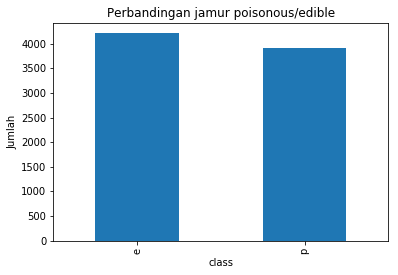

In [6]:
import matplotlib.pyplot as plt

plt.figure()
pd.Series(df['class']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Jumlah")
plt.xlabel("class")
plt.title('Perbandingan jamur poisonous/edible')
plt.show

Data cukup seimbang maka kita dapat melakukan klasifikasi

#Data Preprocessing
Semua kolom dicoba untuk metode ini (All in)

1. tiap kolom yang memiliki lebih dari 2 class akan dibuat dummy kolom

In [7]:
X_dum = pd.DataFrame()
"Buat dummy variabel tiap class tiap kolom, cap-shape,cap-surface,cap-color"

for col in X.iloc[:,:3].columns:
    dum = pd.get_dummies(X[col])
    for dcol in dum.columns:
        name = col +"_"+ dcol
        X_dum[name] = dum[dcol]
        
"odor, gill-attachment, gill-spacing"
for col in X.iloc[:,4:7].columns:
    dum = pd.get_dummies(X[col])
    for dcol in dum.columns:
        name = col +"_"+ dcol
        X_dum[name] = dum[dcol]
        
"gill-color"
dum = pd.get_dummies(X['gill-color'])
for dcol in dum.columns:
    name = "gill-color_"+ dcol
    X_dum[name] = dum[dcol]
    
"sisanya yg memiliki >2 class"
for col in X.iloc[:,10:].columns:
    dum = pd.get_dummies(X[col])
    for dcol in dum.columns:
        name = col +"_"+ dcol
        X_dum[name] = dum[dcol]
        
"bruises"
X_dum['bruises'] = np.where(X['bruises']=='t', 1, 0)

"gill-size"
X_dum['gill-size'] = np.where(X['gill-size']=='b', 1, 0)

"stalk-shape"
X_dum['stalk-shape'] = np.where(X['stalk-shape']=='e', 1, 0)

"ganti value y jika edible 1, poison 0"
Y = np.where(Y=='e', 1,0)


In [12]:
#kolom setelah ditambah dummy
print(X_dum.columns)

Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y',
       ...
       'habitat_d', 'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p',
       'habitat_u', 'habitat_w', 'bruises', 'gill-size', 'stalk-shape'],
      dtype='object', length=113)


2.Pisahkan data training dan testing 70:30

In [8]:
index_train = round(0.7*len(X))
X_train = X_dum.iloc[:index_train,:]
X_test = X_dum.iloc[index_train:,:]
Y_train = Y[:index_train]
Y_test = Y[index_train:]

#Classification


##Naive Bayes
menggunakan algoritma naive bayes mendapatkan tiap kolom probabilitas untuk class edible dan poison

P(X|e) = ?
P(X|p) = ?

![NaiveBayes](https://cdn-images-1.medium.com/max/800/1*iuLad-Li3t-QjPy-lao94Q.png)

In [9]:
import NBClassification as NB
nb = NB.NBClassification(X_train, Y_train, X_test, Y_test)
res2 = nb.predict()

C:\Users\MAMEN\NO1\NBClassification.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.train['class'] = self.Y_train
C:\Users\MAMEN\NO1\NBClassification.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.test['class'] = self.Y_test


##Hasil

Kita lihat confussion matrix dan akurasi

In [30]:
report(res2['actual'],res2['predicted'])

Confussion Matrix:
[[ 185  424]
 [   0 1828]]
Akurasi:  0.826015592942142
Precision:  0.30377668308702793
Recall:  1.0
F-Measure:  0.46599496221662473


Akurasi untuk naive bayes adalah 82% memprediksi tepat sesuai data testing, tetapi model tidak presisi menebak jamur yang bisa dimakan, maka model ini kurang baik.

##K-Nearest Neighbour

Algoritma dengan mengecek k - data terdekat untuk mendapatkan class.

Menggunakan k=7

In [13]:
import KNNClassification as KNN
knn = KNN.KNNClassification(7, X_train, Y_train, X_test, Y_test)
res = knn.predict()

C:\Users\MAMEN\NO1\KNNClassification.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.X_train['class'] = self.Y_train


##Hasil

In [24]:
report(res['actual'],res['predicted'])

Confussion Matrix:
[[ 592    0]
 [  17 1828]]
Akurasi:  0.9930242100943784
Precision:  1.0
Recall:  0.9720853858784894
F-Measure:  0.9858451290591174


Akurasi model hampir 100%, dan model presisi menebak jamur yang bisa dimakan 100%, model ini baik. namun kelemahan K-NN adalah lama saat memprediksi (lazy learner).

#Menentukan feature yang penting


##Test ChiSquare 
mententukan mana feature yang memiliki asosiasi dengan feature class

In [7]:
from ChiSquareTest import ChiSquareTest
from operator import itemgetter

test = ChiSquareTest(df)

arrCol = []
for col in df.iloc[:,1:22].columns:
    p = test.TestIndependence(colX=col,colY="class" )
    arrCol.append((col, p))
print("")
arrCol.sort(key = itemgetter(1))
for i in range(len(arrCol)):
    print(arrCol[i][0],arrCol[i][1])

Kolom  cap-shape  berguna untuk prediksi p-value =  1.1964565685935438e-103
Kolom  cap-surface  berguna untuk prediksi p-value =  5.518427038649143e-68
Kolom  cap-color  berguna untuk prediksi p-value =  6.055814598336576e-78
Kolom  bruises  berguna untuk prediksi p-value =  0.0
Kolom  odor  berguna untuk prediksi p-value =  0.0
Kolom  gill-attachment  berguna untuk prediksi p-value =  5.501707411861009e-31
Kolom  gill-spacing  berguna untuk prediksi p-value =  5.0229776137324786e-216
Kolom  gill-size  berguna untuk prediksi p-value =  0.0
Kolom  gill-color  berguna untuk prediksi p-value =  0.0
Kolom  stalk-shape  berguna untuk prediksi p-value =  4.604746212155192e-20
Kolom  stalk-root  berguna untuk prediksi p-value =  7.702047904943513e-290
Kolom  stalk-surface-above-ring  berguna untuk prediksi p-value =  0.0
Kolom  stalk-surface-below-ring  berguna untuk prediksi p-value =  0.0
Kolom  stalk-color-above-ring  berguna untuk prediksi p-value =  0.0
Kolom  stalk-color-below-ring  ber

##Visualisasi Feature
Visualisasi feature dengan p-value terkecil

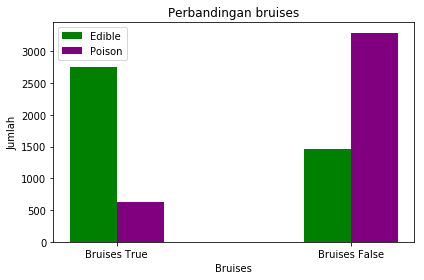

In [9]:
import matplotlib.pyplot as plt

#bruises yes
bt_e = len(df[(df['bruises']=='t') & (df['class']=='e')]['bruises'])
bt_p = len(df[(df['bruises']=='t') & (df['class']=='p')]['bruises'])

#bruises no
bn_e = len(df[(df['bruises']=='f') & (df['class']=='e')]['bruises'])
bn_p = len(df[(df['bruises']=='f') & (df['class']=='p')]['bruises'])

be = (bt_e, bn_e)
bp = (bt_p, bn_p)
# create plot
fig, ax = plt.subplots()
index = np.arange(2)
bar_width = 0.2
opacity = 1

rects1 = plt.bar(index, be, bar_width,
alpha=opacity,
color='green',
label='Edible')

rects2 = plt.bar(index + bar_width, bp, bar_width,
alpha=opacity,
color='purple',
label='Poison')

plt.xlabel('Bruises')
plt.ylabel('Jumlah')
plt.title('Perbandingan bruises')
plt.xticks(index+(bar_width/2), ('Bruises True', 'Bruises False'))
plt.legend()

plt.tight_layout()
plt.show()

Terlihat feature bruises belum representatif terhadap jamur yang dapat dimakan atau tidak, namun bisa disimpulkan jamur yang memiliki bruises probabilitas dapat dimakan lebih besar.

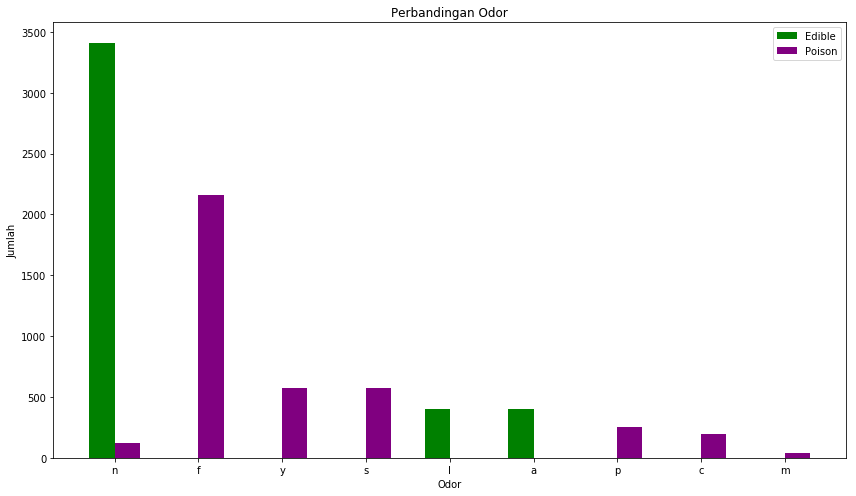

In [13]:
#odor
odors = df['odor'].value_counts()
odor_labels = odors.axes[0].tolist()

odor_e= []    #Edible odor list
odor_p = [] #Poisonous odor list
for odor in odor_labels:
    size = len(df[df['odor'] == odor].index)
    edibles = len(df[(df['odor'] == odor) & (df['class'] == 'e')].index)
    odor_e.append(edibles)
    odor_p.append(size-edibles)
    
fig, ax = plt.subplots(figsize=(12,7))
index = np.arange(9)
bar_width = 0.3
opacity = 1

rects1 = plt.bar(index, odor_e, bar_width,
alpha=opacity,
color='green',
label='Edible')

rects2 = plt.bar(index + bar_width, odor_p, bar_width,
alpha=opacity,
color='purple',
label='Poison')

plt.xlabel('Odor')
plt.ylabel('Jumlah')
plt.title('Perbandingan Odor')
plt.xticks(index+(bar_width/2), odor_labels)
plt.legend()

plt.tight_layout()
plt.show()

Pada feature odor cukup menarik karena tiap kelas hampir representatif terhadap jamur yang bisa dimakan atau beracun, untuk sementara feature odor dianggap paling penting dalam membedakan jamur beracun atau tidak.

bisa dilihat bahwa jamur yang memiliki bau almond dan anise dapat dipastikan bisa dimakan, tetapi ada kemungkinan jamur yang tidak memiliki bau adalah jamur beracun.

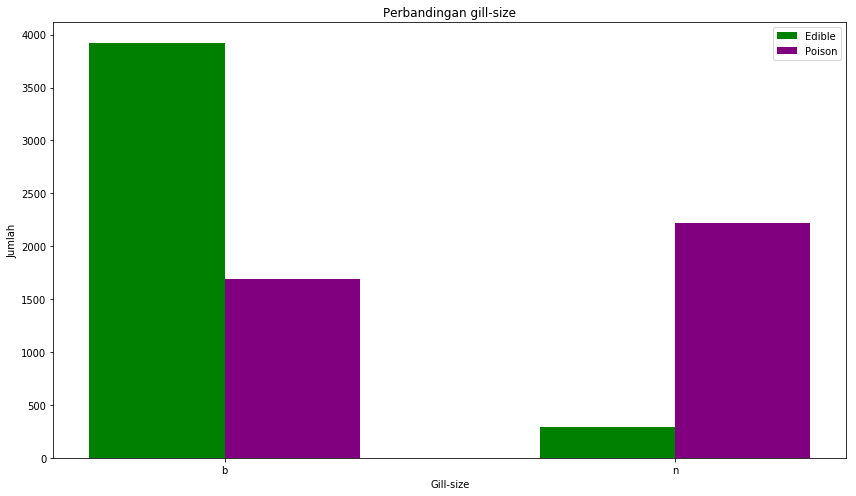

In [20]:
#gill size
c = df['gill-size'].value_counts()
c_labels = c.axes[0].tolist() 
c_e= []
c_p = []
for c in c_labels:
    size = len(df[df['gill-size'] == c].index)
    edibles = len(df[(df['gill-size'] == c) & (df['class'] == 'e')].index)
    c_e.append(edibles)
    c_p.append(size-edibles)
    
fig, ax = plt.subplots(figsize=(12,7))
index = np.arange(2)
bar_width = 0.3
opacity = 1

rects1 = plt.bar(index, c_e, bar_width,
alpha=opacity,
color='green',
label='Edible')

rects2 = plt.bar(index + bar_width, c_p, bar_width,
alpha=opacity,
color='purple',
label='Poison')

plt.xlabel('Gill-size')
plt.ylabel('Jumlah')
plt.title('Perbandingan gill-size')
plt.xticks(index+(bar_width/2), c_labels)
plt.legend()

plt.tight_layout()
plt.show()

Feature gill-size cukup representatif, tetapi belum sebaik seperti odor.

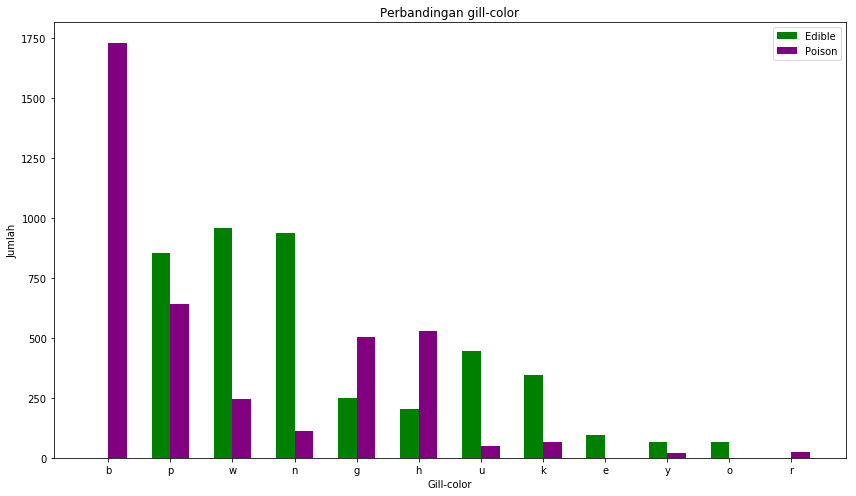

In [21]:
#gill color
c = df['gill-color'].value_counts()
c_labels = c.axes[0].tolist() 
c_e= []
c_p = []
for c in c_labels:
    size = len(df[df['gill-color'] == c].index)
    edibles = len(df[(df['gill-color'] == c) & (df['class'] == 'e')].index)
    c_e.append(edibles)
    c_p.append(size-edibles)
    
fig, ax = plt.subplots(figsize=(12,7))
index = np.arange(12)
bar_width = 0.3
opacity = 1

rects1 = plt.bar(index, c_e, bar_width,
alpha=opacity,
color='green',
label='Edible')

rects2 = plt.bar(index + bar_width, c_p, bar_width,
alpha=opacity,
color='purple',
label='Poison')

plt.xlabel('Gill-color')
plt.ylabel('Jumlah')
plt.title('Perbandingan gill-color')
plt.xticks(index+(bar_width/2), c_labels)
plt.legend()

plt.tight_layout()
plt.show()

Feature gill-color belum representatif juga membedakan mana jamur beracun atau tidak, tetapi beberapa class mewakili mana yang beracun atau tidak seperti:
- black (beracun)
- red (dapat dimakan)
- orange (dapat dimakan)
- green (beracun)

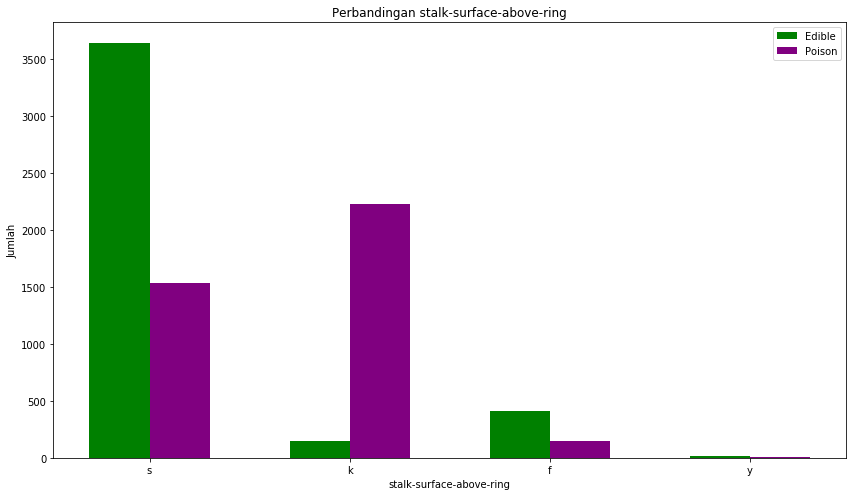

In [23]:
#stalk-surface-above-ring
c = df['stalk-surface-above-ring'].value_counts()
c_labels = c.axes[0].tolist() 
c_e= []
c_p = []
for c in c_labels:
    size = len(df[df['stalk-surface-above-ring'] == c].index)
    edibles = len(df[(df['stalk-surface-above-ring'] == c) & (df['class'] == 'e')].index)
    c_e.append(edibles)
    c_p.append(size-edibles)
    
fig, ax = plt.subplots(figsize=(12,7))
index = np.arange(4)
bar_width = 0.3
opacity = 1

rects1 = plt.bar(index, c_e, bar_width,
alpha=opacity,
color='green',
label='Edible')

rects2 = plt.bar(index + bar_width, c_p, bar_width,
alpha=opacity,
color='purple',
label='Poison')

plt.xlabel('stalk-surface-above-ring')
plt.ylabel('Jumlah')
plt.title('Perbandingan stalk-surface-above-ring')
plt.xticks(index+(bar_width/2), c_labels)
plt.legend()

plt.tight_layout()
plt.show()

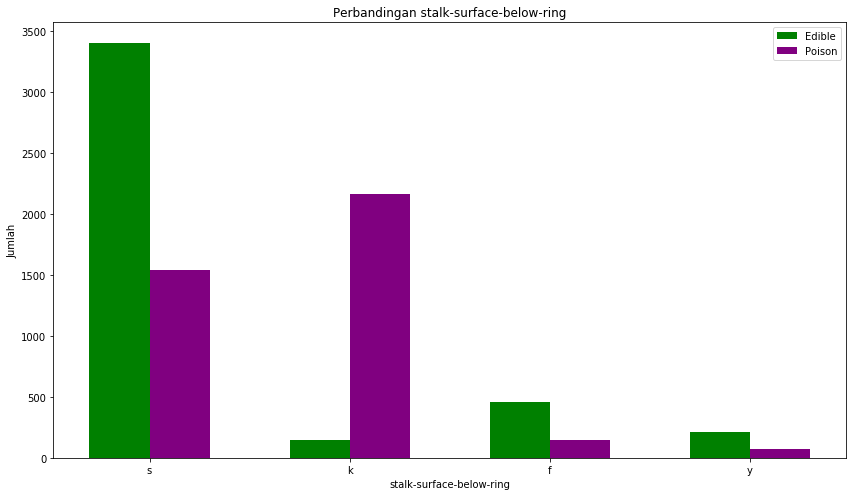

In [24]:
#stalk-surface-below-ring
c = df['stalk-surface-below-ring'].value_counts()
c_labels = c.axes[0].tolist() 
c_e= []
c_p = []
for c in c_labels:
    size = len(df[df['stalk-surface-below-ring'] == c].index)
    edibles = len(df[(df['stalk-surface-below-ring'] == c) & (df['class'] == 'e')].index)
    c_e.append(edibles)
    c_p.append(size-edibles)
    
fig, ax = plt.subplots(figsize=(12,7))
index = np.arange(4)
bar_width = 0.3
opacity = 1

rects1 = plt.bar(index, c_e, bar_width,
alpha=opacity,
color='green',
label='Edible')

rects2 = plt.bar(index + bar_width, c_p, bar_width,
alpha=opacity,
color='purple',
label='Poison')

plt.xlabel('stalk-surface-below-ring')
plt.ylabel('Jumlah')
plt.title('Perbandingan stalk-surface-below-ring')
plt.xticks(index+(bar_width/2), c_labels)
plt.legend()

plt.tight_layout()
plt.show()

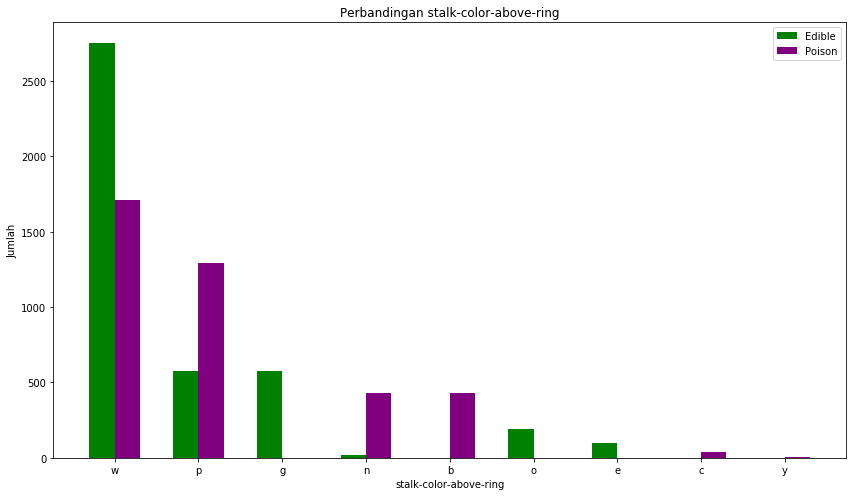

In [25]:
#stalk-color-above-ring
c = df['stalk-color-above-ring'].value_counts()
c_labels = c.axes[0].tolist() 
c_e= []
c_p = []
for c in c_labels:
    size = len(df[df['stalk-color-above-ring'] == c].index)
    edibles = len(df[(df['stalk-color-above-ring'] == c) & (df['class'] == 'e')].index)
    c_e.append(edibles)
    c_p.append(size-edibles)
    
fig, ax = plt.subplots(figsize=(12,7))
index = np.arange(9)
bar_width = 0.3
opacity = 1

rects1 = plt.bar(index, c_e, bar_width,
alpha=opacity,
color='green',
label='Edible')

rects2 = plt.bar(index + bar_width, c_p, bar_width,
alpha=opacity,
color='purple',
label='Poison')

plt.xlabel('stalk-color-above-ring')
plt.ylabel('Jumlah')
plt.title('Perbandingan stalk-color-above-ring')
plt.xticks(index+(bar_width/2), c_labels)
plt.legend()

plt.tight_layout()
plt.show()

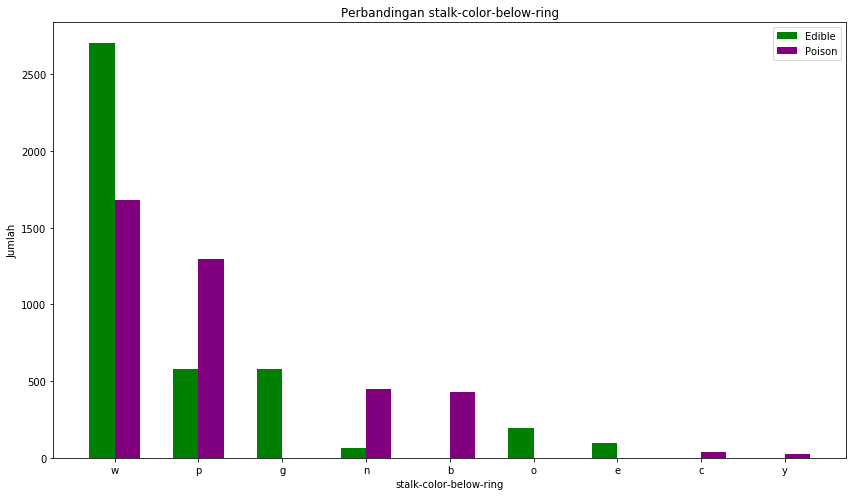

In [26]:
#stalk-color-below-ring
c = df['stalk-color-below-ring'].value_counts()
c_labels = c.axes[0].tolist() 
c_e= []
c_p = []
for c in c_labels:
    size = len(df[df['stalk-color-below-ring'] == c].index)
    edibles = len(df[(df['stalk-color-below-ring'] == c) & (df['class'] == 'e')].index)
    c_e.append(edibles)
    c_p.append(size-edibles)
    
fig, ax = plt.subplots(figsize=(12,7))
index = np.arange(9)
bar_width = 0.3
opacity = 1

rects1 = plt.bar(index, c_e, bar_width,
alpha=opacity,
color='green',
label='Edible')

rects2 = plt.bar(index + bar_width, c_p, bar_width,
alpha=opacity,
color='purple',
label='Poison')

plt.xlabel('stalk-color-below-ring')
plt.ylabel('Jumlah')
plt.title('Perbandingan stalk-color-below-ring')
plt.xticks(index+(bar_width/2), c_labels)
plt.legend()

plt.tight_layout()
plt.show()

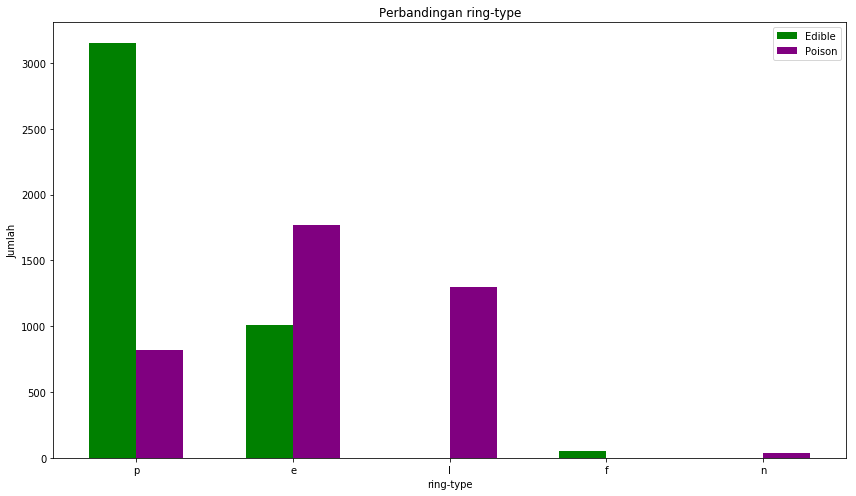

In [29]:
#ring-type
c = df['ring-type'].value_counts()
c_labels = c.axes[0].tolist() 
c_e= []
c_p = []
for c in c_labels:
    size = len(df[df['ring-type'] == c].index)
    edibles = len(df[(df['ring-type'] == c) & (df['class'] == 'e')].index)
    c_e.append(edibles)
    c_p.append(size-edibles)
    
fig, ax = plt.subplots(figsize=(12,7))
index = np.arange(len(c_labels))
bar_width = 0.3
opacity = 1

rects1 = plt.bar(index, c_e, bar_width,
alpha=opacity,
color='green',
label='Edible')

rects2 = plt.bar(index + bar_width, c_p, bar_width,
alpha=opacity,
color='purple',
label='Poison')

plt.xlabel('ring-type')
plt.ylabel('Jumlah')
plt.title('Perbandingan ring-type')
plt.xticks(index+(bar_width/2), c_labels)
plt.legend()

plt.tight_layout()
plt.show()

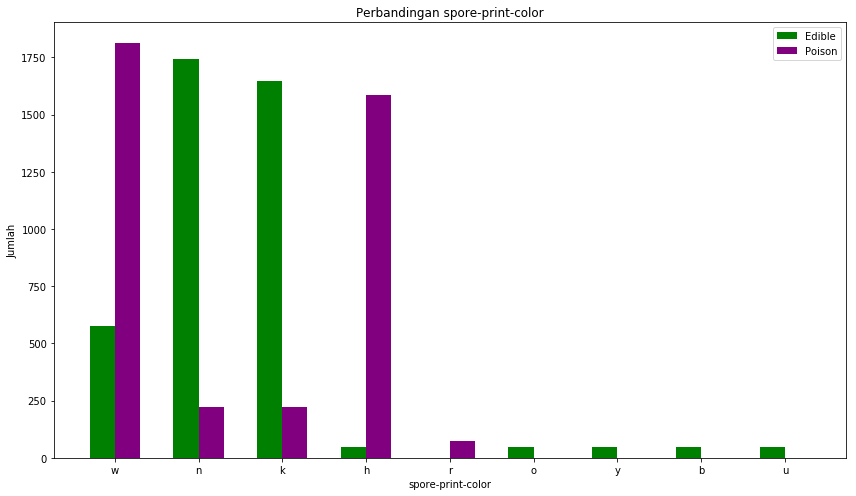

In [30]:
#spore-print-color
c = df['spore-print-color'].value_counts()
c_labels = c.axes[0].tolist() 
c_e= []
c_p = []
for c in c_labels:
    size = len(df[df['spore-print-color'] == c].index)
    edibles = len(df[(df['spore-print-color'] == c) & (df['class'] == 'e')].index)
    c_e.append(edibles)
    c_p.append(size-edibles)
    
fig, ax = plt.subplots(figsize=(12,7))
index = np.arange(len(c_labels))
bar_width = 0.3
opacity = 1

rects1 = plt.bar(index, c_e, bar_width,
alpha=opacity,
color='green',
label='Edible')

rects2 = plt.bar(index + bar_width, c_p, bar_width,
alpha=opacity,
color='purple',
label='Poison')

plt.xlabel('spore-print-color')
plt.ylabel('Jumlah')
plt.title('Perbandingan spore-print-color')
plt.xticks(index+(bar_width/2), c_labels)
plt.legend()

plt.tight_layout()
plt.show()

Feature spore-print-color cukup representatif karena terlihat perbedaan tiap kelas mana yang beracun atau tidak, tapi menurut saya masih lebih baik odor, jadi feature ini sementara menjadi ke 2 terbaik.

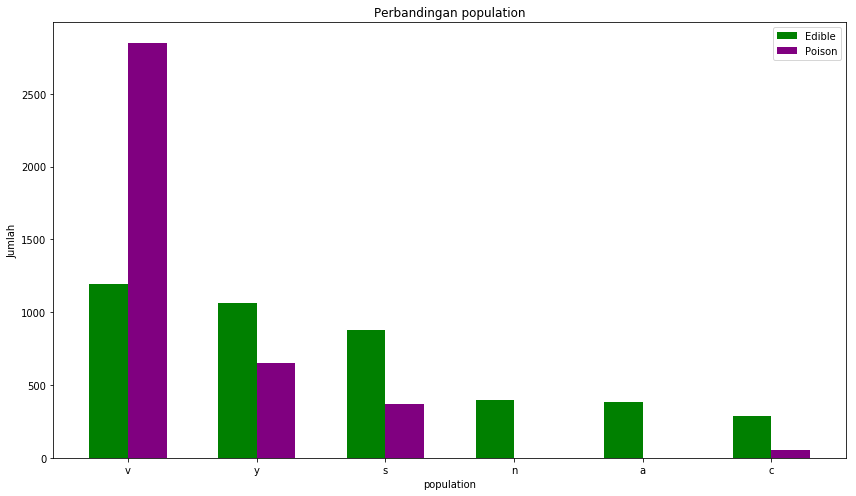

In [33]:
#population
c = df['population'].value_counts()
c_labels = c.axes[0].tolist() 
c_e= []
c_p = []
for c in c_labels:
    size = len(df[df['population'] == c].index)
    edibles = len(df[(df['population'] == c) & (df['class'] == 'e')].index)
    c_e.append(edibles)
    c_p.append(size-edibles)
    
fig, ax = plt.subplots(figsize=(12,7))
index = np.arange(len(c_labels))
bar_width = 0.3
opacity = 1

rects1 = plt.bar(index, c_e, bar_width,
alpha=opacity,
color='green',
label='Edible')

rects2 = plt.bar(index + bar_width, c_p, bar_width,
alpha=opacity,
color='purple',
label='Poison')

plt.xlabel('population')
plt.ylabel('Jumlah')
plt.title('Perbandingan population')
plt.xticks(index+(bar_width/2), c_labels)
plt.legend()

plt.tight_layout()
plt.show()

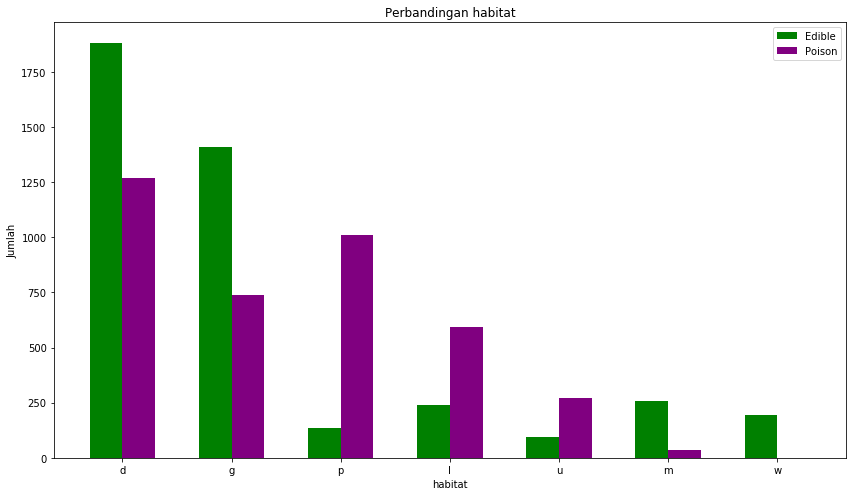

In [34]:
#habitat
c = df['habitat'].value_counts()
c_labels = c.axes[0].tolist() 
c_e= []
c_p = []
for c in c_labels:
    size = len(df[df['habitat'] == c].index)
    edibles = len(df[(df['habitat'] == c) & (df['class'] == 'e')].index)
    c_e.append(edibles)
    c_p.append(size-edibles)
    
fig, ax = plt.subplots(figsize=(12,7))
index = np.arange(len(c_labels))
bar_width = 0.3
opacity = 1

rects1 = plt.bar(index, c_e, bar_width,
alpha=opacity,
color='green',
label='Edible')

rects2 = plt.bar(index + bar_width, c_p, bar_width,
alpha=opacity,
color='purple',
label='Poison')

plt.xlabel('habitat')
plt.ylabel('Jumlah')
plt.title('Perbandingan habitat')
plt.xticks(index+(bar_width/2), c_labels)
plt.legend()

plt.tight_layout()
plt.show()

#Kesimpulan

Menurut perbandingan bar chart diatas, dapat dilihat kolom odor dan spore-print-color cukup representatif dan dapat dijadikan kandidat feature yang paling mengindikasikan jamur beracun dan tidak.